In [1]:
import pdfplumber
import os
import pandas as pd
import numpy as np
import pytesseract
from PIL import Image
from pdf2image import convert_from_path
import cv2
# import fitz

main_folder_path = 'C:/Users/Admin/Desktop/2. 모집 공고문 Crawling File (Modify)'
pytesseract.pytesseract.tesseract_cmd = 'C:/Users/Admin/rag_test/tesseract.exe'
# folder_list = os.listdir(main_folder_path)
# for folder in folder_list:
#   file_list = os.listdir(os.path.join(main_folder_path, folder))
#   print(folder)
#   for file in file_list:
#     print(file)

<b>pdfplumber</b>의 경우<br>당첨자 선정방법 - 소득구분, 도시근로자 가구원수별 가구당 월평균 소득 기준, 자산보유기준은 긴 텍스트와 함께 있어서 잘 추출되지 않음. 

In [ ]:
['도시근로자 가구원수별 가구당 월평균 소득 기준', '건축물가액', '3억3,100만원',
 '세대의 월평균소득이 전년도 도시근로자 가구원수별 월평균소득의 100% 이하인 분']

In [3]:
### pdfplumber로 표 추출
import pdfplumber

main_folder_path = 'C:/Users/Admin/Desktop/2. 모집 공고문 Crawling File (Modify)/01월'
file_list = os.listdir(main_folder_path)

for file in file_list[:3]:
  pdf_path = os.path.join(main_folder_path, file)
  pdf = pdfplumber.open(pdf_path)

  # 공급대상, 공급금액, 예치금액 표가 있는 페이지를 추출합니다.
  pages_to_image = []
  keyword_list = ['주택공급면적', '공급가격', '공급금액 및 납부', '「주택공급에관한규칙」 제60조에 의거 계약금, 중도금, 잔금으로 구분하였으며, 동 규정에 의거 중도금 납부 일자는 건축공정에 따라 변동될 수 있습니다.',
                  '모델', '주택청약종합저축에 가입하여 6개월이 경과하고, 지역별·면적별 예치금액 이상인 1순위자']
  for page in pdf.pages:
    txt = page.extract_text()
    if any(keyword in txt for keyword in keyword_list):
      table = page.extract_table()
      print(table)

[['주택관리번호', '모델', '주택형\n(전용면적기준)', '주택\n타입', '공급\n대상', '대상\n세대', '주택공급면적', None, None, '기타 공용면적\n(지하주차장 등)', '계약면적', '세대별\n대지지분'], [None, None, None, None, None, None, '주거전용면적', '주거공용면적', '소계', None, None, None], [None, '01', '084.9147A', '84A', '신혼부부', '1', '84.9147', '24.2064', '109.1211', '59.9997', '169.1208', None], [None, '02', '084.5681B', '84B', '다자녀가구', '1', '84.5681', '24.6228', '109.1909', '59.7548', '168.9457', None]]
[['청약신청 구분', '공동인증서\n(舊 공인인증서)', '금융인증서\n(YESKEY)', '네이버인증서', 'KB국민인증서', '토스인증서'], ['APT무순위 / 임의공급 / 취소후재공급(계약취소주택)', 'O', 'O', 'X', 'X', 'X']]
[['주택형\n(약식표기)', '동 호', '무상 옵션', None, '유상 옵션', None, None, None, None, None, None, '공급금액\n합계', '계약금(10%)\n(계약시)', '잔금(90%)\n2024.03.29. 까지'], [None, None, '냉장고장', '목창호\n및 강마루', '가전', None, None, '플러스 옵션', None, '시스템 에어컨', None, None, None, None], [None, None, None, None, '광파오븐\n(MZ385\nEBTA)', '식기세척기\n(DUB22SB)', '전기레인지\n(CIR-S3220\nFLBE)', '선택', '금액', '설치 위치', '금액', None, None, None], ['84A', '107-2304', '선택형 3', '선택

<b>OpenCV</b>의 경우<br>바깥 테두리 선 제거가 어려움... 

DMC삼정그린코아 더베스트_2024930006_2024930006.pdf에서 해당 페이지를 저장하였습니다 ---- pages : [5]


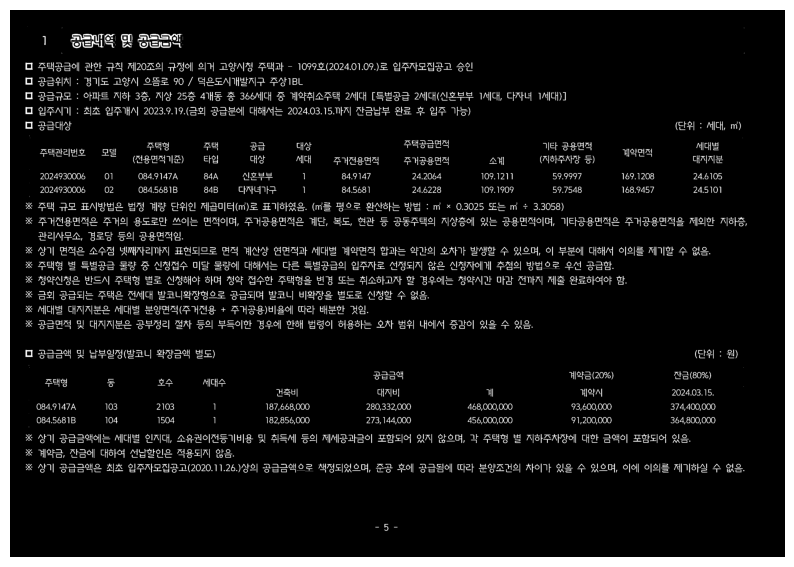

7a hm!   ‘|    그   ㅣ
1 ges @ seek
O 주택공급에 관한 HAL 제20조의 규정에 의거 고양시정 주택과 - 1099호(2024.01.09.)로 입주자모집공고 승인
O 공급위지 : 경기도 고양시 OS2 90 / 덕은도시개발지구 주상18Ｌ
O 공급규모 : 아파트 지하 3증, 지상 25증 4개동 종 366세대 중 계약취소주택 2세대 [특별공급 2세대(신혼부부 1세대, 다자녀 1세대)]
O 입주시기 : 죄조 입주개시 2023.9.19.(금회 공급분에 대해서는 2024.03.15.까지 잔금납부 완료 후 입주 가능)
ㅁ 공급대상                                                                                                             (단위 : 세대, 0)
주택관리번호 모델      주택명      주택      공급      대상                 주택공급면적                 기타 공용면적      wort        세대별
(전용면적기준)    타입      대상      세대    주거전용면적     주거공용면적       소계       (지하주차장 등)                  대지지분
2024930006 01     084.9147A     84A    신혼부부     1       84.9147        24.2064       109.1211       59.9997       169.1208       24.6105
2024930006 02     084.5681B     8468 다자녀가구     1       84.5681        24.6228       109.1909       59.7548       168.9457       24.5101
※ 주택 규모 표시방법은 법정 계량 단위인 제곱미터(7)로 표기하였음. (MS 평으로 환산하는 방법 om x 0.3025 또는 m + 3.3058)
※ 주거전용면

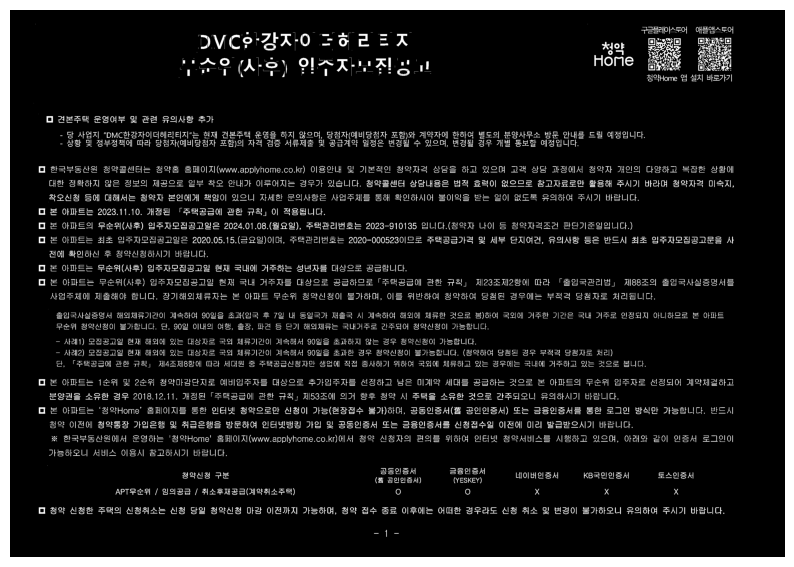

|                             시가 구정 a= Tt                        |       구글플러이스두어 야플맵스두어
2\(60ㅇ:강ㅅ0 -0ㅁㅋ=ㅅ                    Ajor | REPS  Beale
'                                                                                     bs
;       -       .                       ,                                                          uy
r§©AO TLS) OLAZ IAL 고                  Hone !     i
pomp (ASP Pp AT ee Pig -브                     ar    ELSES a:
                                                                                                                         Home SH SA] 바로가기
ㅁ 견본주택 운영여부 및 관련 유의사항 추가
- 당 사업지 “01/6한강자이더헤리티지"는 현재 견본주택 SYS 하지 않으며, 당첨자(예비당첨자 포함)와 계약자에 한하여 별도의 분양사무소 방문 CYS 드릴 예정입니다.
- 상황 및 정부정책에 따라 당점자(예비당첨자 포함)의 자격 검증 서류제출 및 공급계약 일정은 변경될 수 있으며, 변경될 경우 개별 통보할 예정입니다.

OD 한국부동산원 청약콜센터는 청약홈 SHO (www.applyhome.co.kr) 이용안내 및 기본적인 청약자격 ASS 하고 있으며 고객 상담 과정에서 청약자 개인의 다양하고 복잡한 상황에
대한 정확하지 않은 정보의 제공으로 일부 착오 안내가 이루어지는 ALI 있습니다. 청약콜센터 상담내용은 법적 효력이 없으므로 참고자료로만 활용해 주시기 바라며 청약자격 미숙지,


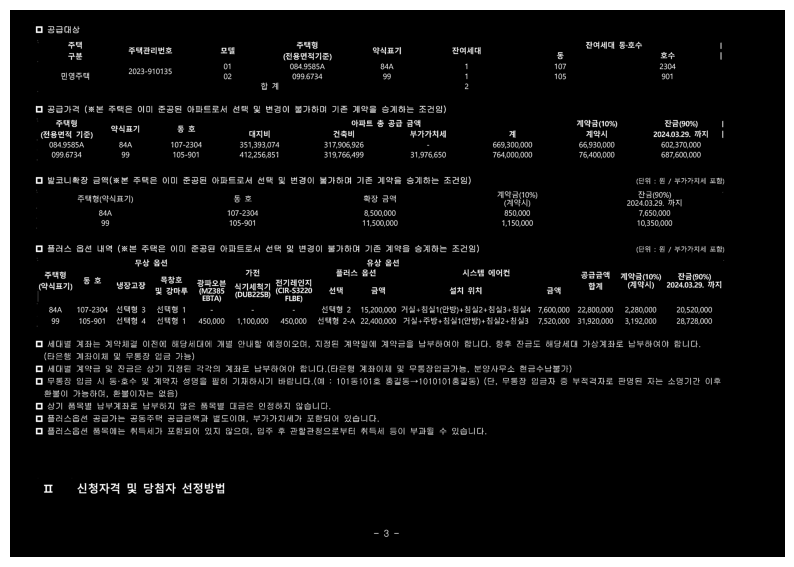

O 공급대상
'     주택           0000                      주택형            =                                 잔여세대 동*호수              |
구분        주택관리번호        모델         (전용면적기존)       약식표기         잔여세대             =                 호수
01          084.9585A          84A            1               107                2304
민영주택       2023-910135         02           099.6734           99             1               105                 901
.                                                합 계                                        2
Oss (KS FHS 이미 FSS 아파트로서 선택 및 AAO 불가하며 기존 ACS 승계하는 조건임)
。 주택형        약식표기        동호                                  아파트 총 공급 금액                                  계약금(10%)          잔금(90%)     |
Say 기준)                              대지비            건축비           부가가치세            계              계약시         2024.03.29. 까지 ㅣ
084.9585A      84A       107-2304       351,393,074        317,906,926           -           669,300,000        66,930,000        602,370,000
099.6734    

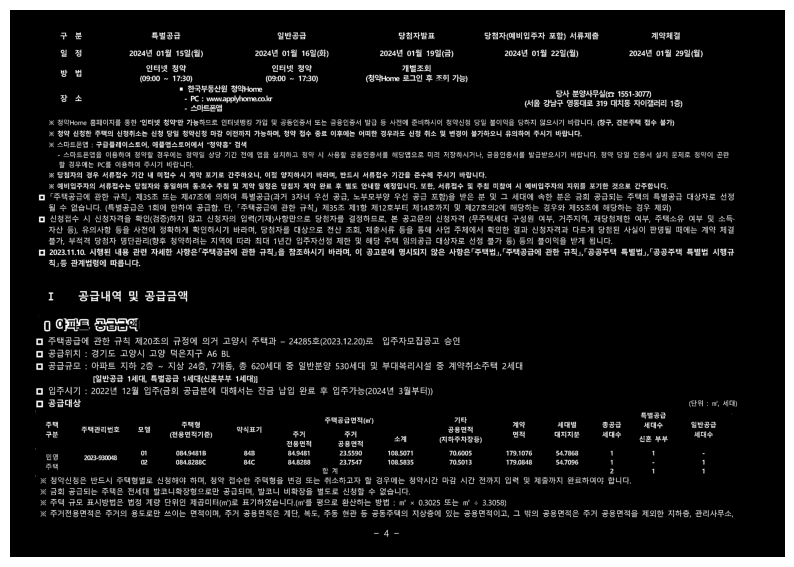

구 분               특별공급                     일반공급                    당첨자발표           당첨자(예비입주자 포함) MBAS           계약체결
일 정          2024년 01월 15일(월)           2024년 01월 16일(화)          2024년 01월 19일(금)          2024년 01월 22일(월)          2024년 01월 29일(월)
방 법          인터넷 청약             인터넷 청약              개별조회
(09:00 ~ 17:30)                 (09:00 ~ 17:30)           (A2Home 로그인 후 조히 가능)
eH ALO
자 소                     se ee ihe ele                                                        ___ SAP 분양사무실 1551-3077
_ATEZy                                                                          (서울 강남구 영동대로 319 대치동 자이갤러리 15)
※ 청약1006 롬페이지를 통한 '인터넷 청약'만 가능하므로 인터넷뱅킹 가입 및 공동인증서 또는 금융인증서 발급 등 사전에 준비하시어 청약신청 당일 불이익을 당하지 않으시기 바랍니다. (창구, 견본주택 접수 불가)
※ 청약 신청한 주택의 신청취소는 신청 당일 청약신청 마감 이전까지 가능하며, 청약 접수 종료 이후에는 어떠한 경우라도 신청 취소 및 변경이 불가하오니 유의하여 주시기 바랍니다.
※ ADESY : 구글플레이스토어, SYA SOA “PHS” 검색
- ADFEZWS 이용하여 Mes 경우에는 AHA 상당 기간 전에 WS 설치하고 청약 시 사용할 공동인증서를 HSMOHS 미리 저장하시거나, 금융인증서를 발급받으시기 바랍니다. 청약 당일 인증서 설치 문제로 청약이 

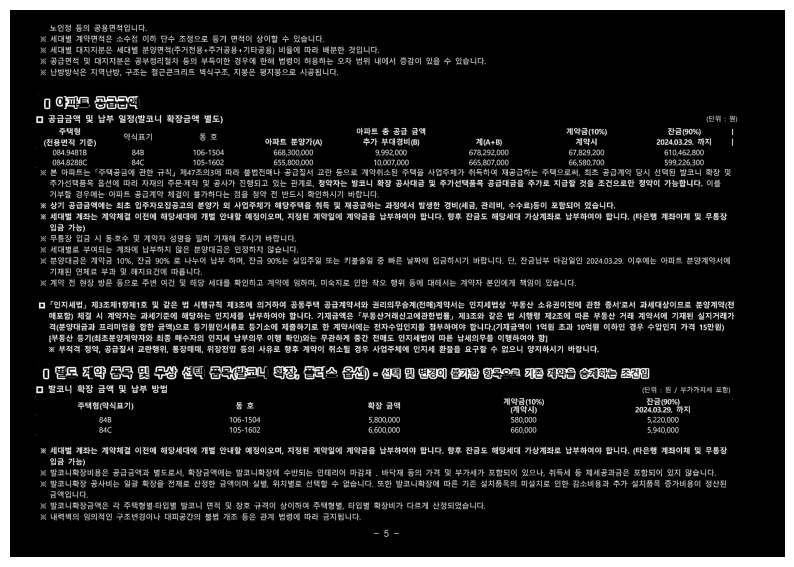

노인정 등의 공용면적입니다.
※ 세대별 계약면적은 소수점 이하 단수 조정으로 등기 면적이 상이할 수 있습니다.
※ 세대별 대지지분은 세대별 분양면적(주거전용+주거공용+기타공용) 비율에 따라 배분한 것입니다.
※ 공급면적 및 대지지분은 공부정리절차 SQ] 부득이한 SPO] 한해 HAO] 허용하는 오차 범위 내에서 증감이 있을 수 있습니다.
※ 난방방식은 지역난방, DAE 철근콘크리트 벽식구조, ABS 평지붕으로 시공됩니다.
Onl
0 Cra 공금 Sg
ㅁ 공급금액 및 납부 일정(발코니 확장금액 별도)                                                                                    (단위 : 원)
주택형          약식표기          동 호                               아파트 종 공급 금액                               Ai SF (10%)             잔금(90%)       |
(전용면적 기준)       a               °              아파트 분양가(0)         추가 부대경비(6)             계(6+8)                 계약시              2024.03.29. 까지     |
084,9481B                      848                        106-1504                        668,300,000                              9,992,000                               678,292,000                              67,829,200                              610,462,800
_  084.82886          846           105-1602           655,800,000   

In [2]:
### 이미지 전처리 (바깥선 제거하기)
import matplotlib.pyplot as plt
import cv2

main_folder_path = 'C:/Users/Admin/Desktop/2. 모집 공고문 Crawling File (Modify)/01월'
file_list = os.listdir(main_folder_path)

for file in file_list[:3]:
  pdf_path = os.path.join(main_folder_path, file)
  pdf = pdfplumber.open(pdf_path)

  # 공급대상, 공급금액, 예치금액 표가 있는 페이지를 추출합니다.
  pages_to_image = []
  keyword_list = ['주택공급면적', '공급가격', '공급금액 및 납부', '「주택공급에관한규칙」 제60조에 의거 계약금, 중도금, 잔금으로 구분하였으며, 동 규정에 의거 중도금 납부 일자는 건축공정에 따라 변동될 수 있습니다.',
                  '모델', '주택청약종합저축에 가입하여 6개월이 경과하고, 지역별·면적별 예치금액 이상인 1순위자']
  for page in pdf.pages:
    txt = page.extract_text()
    if any(keyword in txt for keyword in keyword_list):
      pages_to_image.append(page.page_number)
      # print(page.page_number)

  # convert pdf to image
  images = convert_from_path(pdf_path, dpi=300)
  
  print(f'{file[4:]}에서 해당 페이지를 저장하였습니다 ---- pages : {pages_to_image}')

  if len(pages_to_image) <= 3:
    img_title = ['공급대상', '공급금액', '예치금액']
  elif len(pages_to_image) == 4:
    img_title = ['공급대상', '공급금액1', '공급금액2', '예치금액']
  else:
    print(f"파일에서 정보를 추출하지 못했습니다 ----- file name : {pdf_path}")

  # 추출한 페이지에서 겉테두리를 제거합니다. 
  for idx, page_num in enumerate(pages_to_image):
    pg = images[page_num - 1]
    pg_arr = np.array(pg)
    im = cv2.cvtColor(pg_arr, cv2.COLOR_RGB2BGR)
    gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # 적응형 이진화
    adaptive_binary = cv2.adaptiveThreshold(
        gray_im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10
    )

    # 내부 선 유지 (수평, 수직선 복구)
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 50))
    horizontal_lines = cv2.morphologyEx(adaptive_binary, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_lines = cv2.morphologyEx(adaptive_binary, cv2.MORPH_OPEN, vertical_kernel)

    # 선 합치기
    lines = cv2.add(horizontal_lines, vertical_lines)

    # 선 제거 후 텍스트만 남기기
    text_only = cv2.subtract(adaptive_binary, lines)
    # inverted_image = cv2.bitwise_not(text_only)

    
    plt.figure(figsize=(10,10))
    plt.imshow(text_only, cmap='gray')
    plt.axis('off')
    plt.show()
    
    # OCR 처리 (Tesseract)
    custom_config = r'--oem 3 --psm 6 -l kor+eng'

    # OCR 실행
    text = pytesseract.image_to_string(text_only, config = custom_config)
    print(text)

    # img.save(os.path.join(main_folder_path, f"{file[:-4]}_page_{img_title[idx]}.png"), "PNG")
  

In [28]:
pdf = pdfplumber.open('C:/Users/Admin/Desktop/2. 모집 공고문 Crawling File (Modify)/10월/10월_광안센텀 비스타동원_2024000551_2024000551.pdf')
p0 = pdf.pages[6]
p0.extract_tables()[0]

[['■ 주택형 표시 안내 (청약 신청 시)\n주 택 형 059.9823 059.9782C 084.9620A 084.9413B\n약식 표기 59A 59B 59C 84A 84B\n101동,102동\n동별 배치 103동,105동 106동 102동,104동 107동\n104동,107동\n※ 청약 신청 시 ‘주택형 059.9823’을 선택하실 경우, 동호수 배정은 한국부동산원의 입주자선정 추첨시스템에 따라 59A와 59B 구분 없이 103동, 105동, 106동 중에서 무작위 배정됩니다. 필히 양지하여 주\n시기 바라며, 단지배치도 및 동호수배치도, 단위세대 평면도 등을 반드시 확인 하신 후 청약 신청 및 계약 체결을 진행하여 주시기 바랍니다. 착오 신청으로 인한 책임은 청약신청자 본인에게 있으며, 이\n에 대해 사업주체에 이의를 제기할 수 없습니다.\n※ 주택형 구분은 입주자모집공고상의 표기이며, 견본주택 및 카탈로그/홍보 제작물은 약식으로 표현되어 있을 수 있습니다. 청약 및 계약 시 유의하시기 바랍니다.\n■ 공급금액 및 납부일정 (단위 : ㎡, 원)\n공급금액 계약금(10%) 중도금(60%) 잔금(30%)\n약식 공급 해당\n해당동(라인) 층구분\n표기 세대수 세대수 1차 2차 1회(10%) 2회(10%) 3회(10%) 4회(10%) 5회(10%) 6회(10%)\n대지비 건축비 계 입주지정일\n(계약시) (1개월내) 2025-05-26 2025-08-26 2025-11-26 2026-02-26 2026-08-26 2026-12-28\n1층 2 167,766,000 332,234,000 500,000,000 10,000,000 40,000,000 50,000,000 50,000,000 50,000,000 50,000,000 50,000,000 50,000,000 150,000,000\n2층 2 167,766,000 349,234,000 517,000,000 10,000,000 41,700,000 51,700,000 51,700,000 51,700,000 51,7

In [18]:
supply_price

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,주택\n관리번호,모델,주택형\n(전용면적기준),약식표기,주택공급면적(㎡),None,None,기타\n공용면적\n(지하주차장등),계약\n면적,세대별\n대지지분,총공급\n세대수,특별공급 세대수,None,None,None,None,None,일반공급\n세대수,최하층\n우선배정\n세대수
1,None,None,None,None,주거\n전용면적,주거\n공용면적,소계,None,None,None,None,기관\n추천,다자녀\n가구,신혼\n부부,노부모\n부양,생애\n최초,계,None,None
2,2024000551,01,059.9823,59A,59.9823,22.5015,82.4838,38.6045,121.0883,34.7668,77,8,12,14,3,7,44,33,None
3,None,None,None,59B,59.9823,22.5015,82.4838,38.6045,121.0883,34.7668,None,None,None,None,None,None,None,None,None
4,None,02,059.9782C,59C,59.9782,23.0685,83.0467,38.6018,121.6485,34.7644,34,3,5,7,1,3,19,15,None
5,None,03,084.9620A,84A,84.9620,30.1148,115.0768,54.6814,169.7582,49.2454,80,8,12,14,2,7,43,37,None
6,None,04,084.9413B,84B,84.9413,30.9086,115.8499,54.6680,170.5179,49.2334,17,2,3,3,1,2,11,6,None
7,None,합 계,None,None,None,None,None,None,None,None,208,21,32,38,7,19,117,91,17


In [ ]:



image_path = 'image.png'  # 업로드된 이미지 경로
img = Image.open(image_path)

# OCR로 텍스트 추출
ocr_text = pytesseract.image_to_string(img, lang='kor+eng')

In [68]:
pdf = pdfplumber.open('C:/Users/Admin/Desktop/2. 모집 공고문 Crawling File (Modify)/01월/01월_광명자이힐스테이트SKVIEW_2023000688_2023000688.pdf')
for page in pdf.pages:
  img = page.to_image()
  img.save()

TypeError: PageImage.save() missing 1 required positional argument: 'dest'

In [ ]:
pdf = pdfplumber.open('C:/Users/Admin/Desktop/2. 모집 공고문 Crawling File (Modify)/01월/01월_광명자이힐스테이트SKVIEW_2023000688_2023000688.pdf')
for idx, page in enumerate(pdf.pages):
  txt = page.extract_text()
  if ('공급대상' in txt) and ('주택관리번호' in txt):
    im = page.to_image()
    output_file = f'01월_광명자이힐스테이트SKVIEW_2023000688_2023000688_image_{idx}'
    im.save()
    
  
    # table = [tb for tb in table_list if '주택관리번호' in tb]
    # tb_rows = [tr for tr in table if tr.count(None)]

  
    break
  


AttributeError: 'PageImage' object has no attribute 'tobytes'

In [41]:
pdf = pdfplumber.open('C:/Users/Admin/Desktop/2. 모집 공고문 Crawling File (Modify)/01월/01월_광명자이힐스테이트SKVIEW_2023000688_2023000688.pdf')
pdf.pages[6].extract_tables()

[[['',
   '공급대상',
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   '(단위 : ㎡, 세대)',
   None],
  ['주택\n구분',
   None,
   '주택관리번호',
   '모델',
   '주택형\n(전용면적기준)',
   '약식\n표기',
   '주택공급면적(㎡)',
   None,
   None,
   '기타\n공용면적\n(지하주차장 등)',
   '계약\n면적',
   '세대별\n대지지분',
   '총공급\n세대수',
   '특별공급 세대수',
   None,
   None,
   None,
   None,
   None,
   '일반공급\n세대수',
   None,
   '최하층\n우선배정\n세대수'],
  [None,
   None,
   None,
   None,
   None,
   None,
   '주거\n전용면적',
   '주거\n공용면적',
   '소계',
   None,
   None,
   None,
   None,
   '기관\n추천',
   '다자녀\n가구',
   '신혼\n부부',
   '노부모\n부양',
   '생애\n최초',
   '계',
   None,
   None,
   None],
  [None,
   None,
   '2023000688',
   '01',
   '034.0685A',
   '34A',
   '34.0685',
   '12.1116',
   '46.1801',
   '27.7346',
   '73.9147',
   '16.0291',
   '125',
   '12',
   '-',
   '22',
   '-',
   '11',
   '45',
   '80',
   None,
   None],
  [None,
   None,
   None,


In [ ]:
import pandas as pd
table_list = p0.extract_tables()
sample = table_list[2]



[['약식\n표기',
  '동(라인)',
  '세대수',
  '층\n구분',
  '해당\n세대수',
  '공급금액',
  None,
  None,
  None,
  '계약금(10%)',
  None,
  '중도금(60%)',
  None,
  None,
  None,
  None,
  None,
  '잔금(30%)'],
 [None,
  None,
  None,
  None,
  None,
  '대지비',
  '건축비',
  '부가세',
  '계',
  None,
  None,
  '1회(10%)',
  '2회(10%)',
  '3회(10%)',
  '4회(10%)',
  '5회(10%)',
  '6회(10%)',
  '입주\n지정기간'],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  '계약시',
  '2024.02.20',
  '2024.06.18',
  '2024.11.12',
  '2025.05.13',
  '2025.12.09',
  '2026.05.12',
  '2026.10.13',
  None],
 ['34A',
  '103동 5,6,7,8호\n104동 5,6,7,8호\n105동 5,6,7,8호',
  '125',
  '13층~15층',
  '33',
  '192,525,000',
  '232,475,000',
  '-',
  '425,000,000',
  '10,000,000',
  '32,500,000',
  '42,500,000',
  '42,500,000',
  '42,500,000',
  '42,500,000',
  '42,500,000',
  '42,500,000',
  '127,500,000'],
 [None,
  None,
  None,
  '16층~20층',
  '60',
  '196,602,000',
  '237,398,000',
  '-',
  '434,000,000',
  '10,000,000',
  '33,400,000',
  '43,40